## <span style="color:red"> Homework 1 </span>

# Disclaimer
* This notebook has been written by Benjamin Amar in 2023 DSAIS class at Em-Lyon.
* Generative AI (ChatGPT 4) has been used for debugging, inspiration.
* I have wasted way too much time to improve my R² for the linear regression instead of accepting the fact that it's not meant to predict binary features.

**I. Data splitting and merging by columns**

1. Import your toy dataset with pandas
2. Split your dataframe into two other dataframes : all the categorical variables in one hand and all the quantitative variables in the other hand
3. Save these two dataframes into two different csv files
4. Import these two csv files and merge them back together : do you retrieve your original dataframe?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
toydataset = pd.read_csv("Toydataset.csv")

toydataset.head()

,Rank,Game,Month_str,Month,Year,YearTop1,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1.0,League of Legends,NaN,1.0,2016.0,False,94377226.0,1362044.0,530270.0,2903.0,129172.0,127021.0,NaN,69.29
1,2.0,Counter-Strike: Global Offensive,January,1.0,2016.0,True,47832863.0,830105.0,372654.0,2197.0,NaN,64378.0,1117.0,57.62
2,3.0,Dota 2,January,1.0,2016.0,False,45185893.0,433397.0,NaN,1100.0,44074.0,60815.0,583.0,104.26
3,4.0,Hearthstone,January,1.0,2016.0,False,39936159.0,235903.0,NaN,NaN,36170.0,53749.0,317.0,169.29
4,5.0,Call of Duty: Black Ops III,January,1.0,2016.0,False,16153057.0,1151578.0,71639.0,NaN,214054.0,21740.0,1549.0,14.03


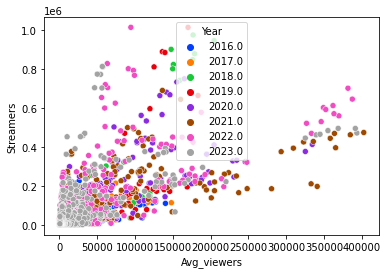

In [3]:
sns.scatterplot(x = "Avg_viewers", y = "Streamers", 
                hue = "Year", 
                data = toydataset, palette = "bright");

In [4]:
# Splitting the dataframe based on data types
toydataset_categorical = toydataset.select_dtypes(include=['object', 'bool'])
toydataset_quantitative = toydataset.select_dtypes(exclude=['object', 'bool'])

toydataset_categorical.head(), toydataset_quantitative.head()

(                               Game Month_str  YearTop1
 0                 League of Legends       NaN     False
 1  Counter-Strike: Global Offensive   January      True
 2                            Dota 2   January     False
 3                       Hearthstone   January     False
 4       Call of Duty: Black Ops III   January     False,
    Rank  Month    Year  Hours_watched  Hours_streamed  Peak_viewers  \
 0   1.0    1.0  2016.0     94377226.0       1362044.0      530270.0   
 1   2.0    1.0  2016.0     47832863.0        830105.0      372654.0   
 2   3.0    1.0  2016.0     45185893.0        433397.0           NaN   
 3   4.0    1.0  2016.0     39936159.0        235903.0           NaN   
 4   5.0    1.0  2016.0     16153057.0       1151578.0       71639.0   
 
    Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  
 0         2903.0   129172.0     127021.0           NaN             69.29  
 1         2197.0        NaN      64378.0        1117.0             57.

In [5]:
# Saving dataframes
toydataset_categorical.to_csv("Toydataset_data_categorical.csv", index=False)
toydataset_quantitative.to_csv("Toydataset_data_quantitative.csv", index=False)

# Importing back the files
toydataset_categorical = pd.read_csv("Toydataset_data_categorical.csv")
toydataset_quantitative = pd.read_csv("Toydataset_data_quantitative.csv")

# Merging dataframes
toydataset_merged = pd.concat([toydataset_quantitative, toydataset_categorical], axis=1)

# Check if the merged dataframe is the same as the original
toydataset.equals(toydataset_merged)

False

It's not the same as the original because we need to move the columns at their original index

In [6]:
# Rearranging the columns
correct_order = ['Rank', 'Game', 'Month_str', 'Month', 'Year', 'YearTop1', 'Hours_watched', 'Hours_streamed', 
                 'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']

toydataset_merged_correct_order = toydataset_merged[correct_order]

# Check if the correctly ordered merged dataframe is the same as the original
toydataset.equals(toydataset_merged_correct_order)

True

**II. Data splitting and merging by rows**
1. Now split your toy dataset in two parts with the 30% first rows called test and the 70% remaining rows called train
2. save your test set and your train set in two different csv files
3. Import these two csv files and merge them back together : do you retrieve your original dataframe?

In [7]:
# Splitting the data
split_point = int(0.3 * len(toydataset))
test_data = toydataset.iloc[:split_point]
train_data = toydataset.iloc[split_point:]

# Saving the data
test_data.to_csv("Toydataset_data_test.csv", index=False)
train_data.to_csv("Toydataset_data_train.csv", index=False)

In [8]:
# Importing the data from the saved CSVs
test_imported = pd.read_csv("Toydataset_data_test.csv")
train_imported = pd.read_csv("Toydataset_data_train.csv")

# Merging the datasets
merged_data = pd.concat([test_imported, train_imported], axis=0).reset_index(drop=True)

# Check if the merged dataframe is equal to the original dataframe
toydataset.equals(merged_data)

True

**III. Linear Regression:**

*Select an appropriate binary variable - justify your choice if possible - to be used as output*

1. Import a Linear Regression Model from the appropriate Python package(s)
2. Train your model
3. Compute the performance of your Linear Regression Model in several ways and justify your choice
4. Provide test statistics and standardized values to your estimated parameters
5. Given a full interpretation of your results, including variable importance and explainability if possible

* We choose YearTop1 as our target value since it's the only binary one

* YearTop1 is a value representing if the selected game is the most watched in average on Twitch of the year.

* Handle missing values

* Encode categorical variables to numerical variables



In [9]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [10]:
# Drop the 'Month_str' column because it's the same information as 'Month' feature
toydataset.drop(['Month_str'], axis=1, inplace=True)

### Let's handle the NaN values

In [11]:
# Define imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# NaN in Game columns are dropped since we don't know which game they are referring to
toydataset.dropna(subset=['Game'], inplace=True)

# Columns to be imputed
median_cols = ['Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']
mode_cols = ['Month', 'Year', 'Rank']

# Apply imputers on training data
toydataset[median_cols] = median_imputer.fit_transform(toydataset[median_cols])
toydataset[mode_cols] = mode_imputer.fit_transform(toydataset[mode_cols])

# Apply imputers on test data (Note: We use the same imputer object to prevent data leakage)
toydataset[median_cols] = median_imputer.transform(toydataset[median_cols])
toydataset[mode_cols] = mode_imputer.transform(toydataset[mode_cols])

# Check if NaN values are eliminated
toydataset.isna().sum()

Rank                0
Game                0
Month               0
Year                0
YearTop1            0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

### We tried using one hot encoding method, however with the high amount of categories in our categorical feature, we should aim towards an other kind of encoding method.

In [12]:
#Encoding categorical nominal features with One Hot Encoding method
"""
for column in ['Game']:
    dummies = pd.get_dummies(toydataset[column])
    dummies.columns = ['_'.join([column.upper(), str(c).replace(' ', '_')]) for c in dummies.columns]
    plt.figure()
    dummies.mean().plot(kind='barh')
    plt.title(f'Visualisation de la fréquence des dummies\npour la variable {column}')
    plt.xlabel('Fréquence')
    plt.show()
    dummies.drop(dummies.columns[-1], axis=1, inplace=True)
    toydataset = toydataset.drop(column, axis=1)
    toydataset = pd.concat([toydataset.T, dummies.T]).T
"""

"\nfor column in ['Game']:\n    dummies = pd.get_dummies(toydataset[column])\n    dummies.columns = ['_'.join([column.upper(), str(c).replace(' ', '_')]) for c in dummies.columns]\n    plt.figure()\n    dummies.mean().plot(kind='barh')\n    plt.title(f'Visualisation de la fréquence des dummies\npour la variable {column}')\n    plt.xlabel('Fréquence')\n    plt.show()\n    dummies.drop(dummies.columns[-1], axis=1, inplace=True)\n    toydataset = toydataset.drop(column, axis=1)\n    toydataset = pd.concat([toydataset.T, dummies.T]).T\n"

### Let's use the frequency encoding method

In [13]:
# Perform Frequency Encoding on the 'Game' column in the training dataset
frequency_encoding = toydataset['Game'].value_counts() / len(toydataset)
toydataset['Game_freq_enc'] = toydataset['Game'].map(frequency_encoding)

In [14]:
toydataset.head()

,Rank,Game,Month,Year,YearTop1,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Game_freq_enc
0,1.0,League of Legends,1.0,2016.0,False,94377226.0,1362044.0,530270.0,2903.0,129172.0,127021.0,53.0,69.29,0.005200
1,2.0,Counter-Strike: Global Offensive,1.0,2016.0,True,47832863.0,830105.0,372654.0,2197.0,5011.5,64378.0,1117.0,57.62,0.005019
2,3.0,Dota 2,1.0,2016.0,False,45185893.0,433397.0,22801.0,1100.0,44074.0,60815.0,583.0,104.26,0.005080
3,4.0,Hearthstone,1.0,2016.0,False,39936159.0,235903.0,22801.0,146.0,36170.0,53749.0,317.0,169.29,0.004838
4,5.0,Call of Duty: Black Ops III,1.0,2016.0,False,16153057.0,1151578.0,71639.0,146.0,214054.0,21740.0,1549.0,14.03,0.002177


### Our dataset is now clean and ready for training

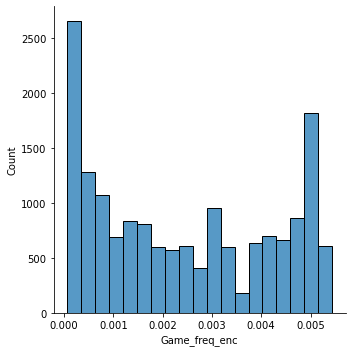

In [15]:
sns.displot(toydataset["Game_freq_enc"])

In [16]:
# Prepare feature matrix X and target vector y
X = toydataset.drop(['YearTop1'], axis=1)
y = toydataset['YearTop1']

# Convert YearTop1 to numerical format (0 or 1)
y = y.astype(int)

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that first normalizes the data then applies linear regression
lr_pipeline = make_pipeline(StandardScaler(), LinearRegression()) #This part was edited because normalize parameter is deprecated

# Train the model using the training data
lr_pipeline.fit(X_train, y_train)

# Predict the test set
y_pred = lr_pipeline.predict(X_test)

In [18]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)

# rmse
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

# error
print('Error: ', rmse/toydataset['YearTop1'].mean())

Mean Squared Error:  0.10086808000421683
R2 Score:  0.00031687606338803853
Root Mean Squared Error:  0.317597355159354
Error:  2.7212992032488277


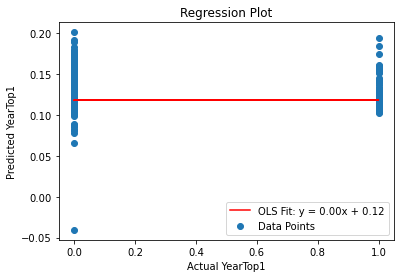

In [19]:
# Scatter plot
plt.scatter(y_test, y_pred, label='Data Points')

# OLS Regression Line
coefficients = np.polyfit(y_test, y_pred, 1)
y_fit = np.polyval(coefficients, y_test)
plt.plot(y_test, y_fit, color='red', label=f'OLS Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Labels and Title
plt.xlabel('Actual YearTop1')
plt.ylabel('Predicted YearTop1')
plt.title('Regression Plot')
plt.legend()

# Show the plot
plt.show()

### We can see that we have a very low coefficient of determination meaning that our model is not ideal. Linear regression models are not meant for predicting binary features.

**IV. Logistic Regression**

*Select an appropriate binary variable - justify your choice if possible - to be used as output*

1. Import a Logistic Regression Model from the appropriate Python packages(s)
2. Train your model
3. Assess the performance of your model, if possible in different ways and justify your choice
4. Provide test statistics and standardized values to your estimated parameters
5. Given a full interpretation of your results, including variable importance and explainability if possible

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
# Split the data into training and test sets
X2 = toydataset.drop(columns=['YearTop1','Game'])
y2 = toydataset['YearTop1']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [22]:
# Fit the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X2_train, y2_train)

D:\Programmes\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [23]:
log_reg.score(X2_test, y2_test)

0.8857315598548973

### Our model is way more reliable than linear regression with a R² around 89%

***K neighbors model:***

Repeat the 5 previous steps for the the K Nearest Neighbors Model :
1. Which is the best model amongst the two?
2. What if we fitted and estimated the score of the models using all the dataset? Would there be a difference?